# NFL Combine Classification Modeling

## Exploratory Data Analysis

## Project Goals

- Determine the influence the NFL Combine has on a prospect's draft status (getting drafted or not).
- Reveal how much the NFL Combine factors in on a prospect's draft value (how early or how late a prospect gets drafted, if at all).
- Discover which NFL Combine drills have the most impact on a prospect's draft position.

## Summary of Data

The dataset that was analyzed for this study contains 9,544 observations of NFL Combine and NFL Draft data, dating from 1987-2017.

### Library Import

In [1]:
#Import libraries
%run ../python_files/libraries
%matplotlib inline

/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data Importing, Data Merging, and Data Cleaning

In [2]:
# import NFL Combine and NFL Draft data
nfl_combine_df = pd.read_csv('../data/nfl_combine_cleaned.csv')
nfl_draft_df = pd.read_csv('../data/nfl_draft_data.csv')

# quick overview of the NFL Combine dataset
nfl_combine_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,0,0,0,0,0,0,0,0,1
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,0,0,0,0,0,0,0,1,1
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,0,0,0,0,0,0,0,0,0
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,0,0,0,0,0,0,0,0,1
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,NaN,0,0,0,1,0,0,0,0,1
9518,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1
9519,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,NaN,0,0,0,0,0,0,0,0,1
9520,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,NaN,0,0,0,0,0,0,0,0,1


In [3]:
# quick overview of the NFL Draft dataset
nfl_draft_df

,player_name,first_name,last_name,combine_year,round,pick,team
0,jameis_winston,jameis,winston,2015,1,1,tb
1,marcus_mariota,marcus,mariota,2015,1,2,ten
2,dante_fowler,dante,fowler,2015,1,3,jax
3,amari_cooper,amari,cooper,2015,1,4,oak
4,brandon_scherff,brandon,scherff,2015,1,5,was
...,...,...,...,...,...,...,...
8174,xavier_woods,xavier,woods,2017,6,191,dal
8175,zach_banner,zach,banner,2017,4,137,ind
8176,zach_cunningham,zach,cunningham,2017,2,57,hou
8177,zane_gonzalez,zane,gonzalez,2017,7,224,cle


In [4]:
# merge the NFL Combine and NFL Draft datasets with an outer join so that all values and rows are retained
nfl_merged_df = pd.merge(nfl_combine_df, nfl_draft_df, how = 'left', on = ['player_name', 'last_name',
                                                                                'first_name', 'combine_year'])

# impute round and pick values to reflect undrafted players. round '13' means undrafted (draft lasts only 12 rounds)
# and pick '337' means undrafted (only 336 players get drafted). 'udfa' means no team drafted the players, therefore
# making them undrafted free agents (udfa).
nfl_merged_df['round'].fillna('13', inplace=True)
nfl_merged_df['pick'].fillna('337', inplace=True)
nfl_merged_df['team'].fillna('udfa', inplace=True)

# change round and pick variables to integer values
nfl_merged_df['round'] = nfl_merged_df['round'].astype(int)
nfl_merged_df['pick'] = nfl_merged_df['pick'].astype(int)

# quick overview of nfl_df dataset
nfl_merged_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed,round,pick,team
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,0,0,0,0,0,0,0,0,1,1,6,nyj
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,0,0,0,0,0,0,0,1,1,3,93,gb
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,0,0,0,0,0,0,0,0,0,5,170,min
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,0,0,0,0,0,0,0,0,1,13,337,udfa
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,0,0,0,0,0,0,0,0,1,5,173,pit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,NaN,0,0,0,1,0,0,0,0,1,1,1,tb
9540,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1,13,337,udfa
9541,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,NaN,0,0,0,0,0,0,0,0,1,4,113,det
9542,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,NaN,0,0,0,0,0,0,0,0,1,2,36,jax


In [5]:
# quick review of the variables in the NFL merged dataset
nfl_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 9543
Data columns (total 29 columns):
player_name                    9544 non-null object
first_name                     9544 non-null object
last_name                      9544 non-null object
college                        9544 non-null object
position                       9544 non-null object
combine_year                   9544 non-null int64
height_inches                  9544 non-null float64
weight_lbs                     9544 non-null int64
hand_size_inches               8413 non-null float64
arm_length_inches              8095 non-null float64
40_yard_dash                   8670 non-null float64
bench_press_reps               6779 non-null float64
vertical_leap_inches           8056 non-null float64
broad_jump_inches              7908 non-null float64
3_cone_drill                   4510 non-null float64
20_yard_shuttle                7178 non-null float64
60_yard_shuttle                3175 non-null float64
h

In [6]:
# quick review of the characteristics of the feature variables in the dataset
nfl_merged_df.describe()

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed,round,pick
count,9544.000000,9544.000000,9544.000000,8413.000000,8095.000000,8670.000000,6779.000000,8056.000000,7908.000000,4510.000000,7178.000000,3175.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000
mean,2001.615675,73.739848,240.252410,9.528350,32.220723,4.831063,19.829473,32.006703,112.318032,7.345909,4.403415,11.674400,0.118504,0.151823,0.091576,0.289711,0.155909,0.171417,0.527452,0.247904,0.667330,7.426970,198.624581
std,9.093656,2.643758,44.993302,0.629206,1.498260,0.310541,6.538973,4.202374,9.307441,0.446774,0.268862,0.425573,0.323221,0.358868,0.288441,0.453652,0.362789,0.376892,0.499272,0.431819,0.471194,4.613548,120.381940
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.210000,1.000000,17.500000,7.000000,6.340000,3.730000,10.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1993.000000,71.880000,203.000000,9.130000,31.250000,4.590000,15.000000,29.000000,106.000000,7.010000,4.200000,11.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,88.000000
50%,2001.000000,74.000000,232.000000,9.500000,32.250000,4.760000,20.000000,32.000000,113.000000,7.260000,4.370000,11.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000,188.000000
75%,2010.000000,75.750000,275.000000,10.000000,33.250000,5.050000,24.000000,35.000000,119.000000,7.620000,4.570000,11.930000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,13.000000,337.000000
max,2017.000000,82.400000,387.000000,11.880000,38.500000,6.120000,51.000000,46.000000,147.000000,9.610000,5.680000,13.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,337.000000


In [7]:
# check the number of missing values in the NFL merged dataset
nfl_merged_df.isna().sum()

player_name                       0
first_name                        0
last_name                         0
college                           0
position                          0
combine_year                      0
height_inches                     0
weight_lbs                        0
hand_size_inches               1131
arm_length_inches              1449
40_yard_dash                    874
bench_press_reps               2765
vertical_leap_inches           1488
broad_jump_inches              1636
3_cone_drill                   5034
20_yard_shuttle                2366
60_yard_shuttle                6369
hand_size_inches_missed           0
arm_length_inches_missed          0
40_yard_dash_missed               0
bench_press_reps_missed           0
vertical_leap_inches_missed       0
broad_jump_inches_missed          0
3_cone_drill_missed               0
20_yard_shuttle_missed            0
60_yard_shuttle_missed            0
round                             0
pick                        

Since the 60_yard_shuttle column is missing almost 70% of the total observations, we decided that it would be best to remove this column, as majority of the players within our data did not participate in this drill. We are keeping all other columns for further evaluation.

In [8]:
nfl_merged_df = nfl_merged_df.drop(['60_yard_shuttle', '60_yard_shuttle_missed'], axis = 1)
nfl_merged_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,team
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,0,0,0,0,0,0,0,0,1,6,nyj
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,0,0,0,0,0,0,0,1,3,93,gb
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,0,0,0,0,0,0,0,0,5,170,min
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,0,0,0,0,0,0,0,0,13,337,udfa
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,0,0,0,0,0,0,0,0,5,173,pit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,0,0,0,1,0,0,0,0,1,1,tb
9540,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,13,337,udfa
9541,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,0,0,0,0,0,0,0,0,4,113,det
9542,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,0,0,0,0,0,0,0,0,2,36,jax


## Data Transformations



In [9]:
# created draft_status column. '1' means the player was drafted and '0' means the player was undrafted
nfl_merged_df['draft_status'] = nfl_merged_df['round'].astype(str).map({'1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1,
                                                                        '7': 1, '8': 1, '9': 1, '10': 1, '11': 1,
                                                                        '12': 1, '13': 0})

# created draft_value column. '1' means the player was a Day 1 draft pick (selected in Round 1), '2' means the player
# was a Day 2 draft pick (selected in Rounds 2-3), '3' means the player was a Day 3 draft pick (selected in
# Rounds 4-7), '4' means the player was selected in Rounds 8-12 (the draft used to follow a 12 round format until
# 1993. 1993 draft was 8 rounds. 1994-present drafts are 7 rounds.), '5' means the player was undrafted.
nfl_merged_df['draft_value'] = nfl_merged_df['round'].astype(str).map({'1': 1, '2': 2, '3': 2, '4': 3, '5': 3, '6': 3, 
                                                                       '7': 3, '8': 4, '9': 4, '10': 4, '11': 4,
                                                                       '12': 4, '13': 5})

In [10]:
nfl_merged_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,team,draft_status,draft_value
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,0,0,0,0,0,0,0,0,1,6,nyj,1,1
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,0,0,0,0,0,0,0,1,3,93,gb,1,2
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,0,0,0,0,0,0,0,0,5,170,min,1,3
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,0,0,0,0,0,0,0,0,13,337,udfa,0,5
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,0,0,0,0,0,0,0,0,5,173,pit,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,0,0,0,1,0,0,0,0,1,1,tb,1,1
9540,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,13,337,udfa,0,5
9541,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,0,0,0,0,0,0,0,0,4,113,det,1,3
9542,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,0,0,0,0,0,0,0,0,2,36,jax,1,2


In [11]:
nfl_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 9543
Data columns (total 29 columns):
player_name                    9544 non-null object
first_name                     9544 non-null object
last_name                      9544 non-null object
college                        9544 non-null object
position                       9544 non-null object
combine_year                   9544 non-null int64
height_inches                  9544 non-null float64
weight_lbs                     9544 non-null int64
hand_size_inches               8413 non-null float64
arm_length_inches              8095 non-null float64
40_yard_dash                   8670 non-null float64
bench_press_reps               6779 non-null float64
vertical_leap_inches           8056 non-null float64
broad_jump_inches              7908 non-null float64
3_cone_drill                   4510 non-null float64
20_yard_shuttle                7178 non-null float64
hand_size_inches_missed        9544 non-null int64
arm

In [12]:
nfl_merged_df.describe()

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,draft_status,draft_value
count,9544.000000,9544.000000,9544.000000,8413.000000,8095.000000,8670.000000,6779.000000,8056.000000,7908.000000,4510.000000,7178.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000
mean,2001.615675,73.739848,240.252410,9.528350,32.220723,4.831063,19.829473,32.006703,112.318032,7.345909,4.403415,0.118504,0.151823,0.091576,0.289711,0.155909,0.171417,0.527452,0.247904,7.426970,198.624581,0.640612,3.410310
std,9.093656,2.643758,44.993302,0.629206,1.498260,0.310541,6.538973,4.202374,9.307441,0.446774,0.268862,0.323221,0.358868,0.288441,0.453652,0.362789,0.376892,0.499272,0.431819,4.613548,120.381940,0.479846,1.357783
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.210000,1.000000,17.500000,7.000000,6.340000,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1993.000000,71.880000,203.000000,9.130000,31.250000,4.590000,15.000000,29.000000,106.000000,7.010000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,88.000000,0.000000,2.000000
50%,2001.000000,74.000000,232.000000,9.500000,32.250000,4.760000,20.000000,32.000000,113.000000,7.260000,4.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,188.000000,1.000000,3.000000
75%,2010.000000,75.750000,275.000000,10.000000,33.250000,5.050000,24.000000,35.000000,119.000000,7.620000,4.570000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,13.000000,337.000000,1.000000,5.000000
max,2017.000000,82.400000,387.000000,11.880000,38.500000,6.120000,51.000000,46.000000,147.000000,9.610000,5.680000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,337.000000,1.000000,5.000000


## Initial Data Findings

In [13]:
# players who attended the NFL combine and were drafted
# 6226 NFL combine attendees out of 9972 were drafted
nfl_combine_df[nfl_combine_df.last_name.isin(nfl_draft_df.last_name)]

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,0,0,0,0,0,0,0,0,1
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,0,0,0,0,0,0,0,1,1
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,0,0,0,0,0,0,0,0,0
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,0,0,0,0,0,0,0,0,1
5,jonathan_allen,jonathan,allen,alabama,dl,2017,74.63,286,9.38,33.63,5.00,21.0,30.0,108.0,7.49,4.44,NaN,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516,ramik_wilson,ramik,wilson,georgia,lb,2015,74.00,237,10.63,33.00,4.77,23.0,35.0,111.0,NaN,4.51,NaN,0,0,0,0,0,0,1,0,1
9517,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,NaN,0,0,0,1,0,0,0,0,1
9518,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1
9519,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,NaN,0,0,0,0,0,0,0,0,1


In [14]:
# players who attended the NFL combine but did not get drafted
# 3296 NFL combine attendees out of 9972 went undrafted
nfl_combine_df[~nfl_combine_df.last_name.isin(nfl_draft_df.last_name)]

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,0,0,0,0,0,0,0,0,1
10,antony_auclair,antony,auclair,laval,fb_te,2017,78.00,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.45,12.08,1,1,1,1,1,1,1,0,0
11,erik_austell,erik,austell,charleston_southern,ol,2017,75.13,301,9.00,32.00,5.23,24.0,27.5,107.0,8.13,4.90,NaN,0,0,0,0,0,0,0,0,1
20,collin_bevins,collin,bevins,northwest_missouri_state,dl,2017,78.00,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.39,NaN,1,1,1,1,1,1,1,0,1
24,garett_bolles,garett,bolles,utah,ol,2017,77.25,297,9.38,34.00,4.95,NaN,28.0,115.0,7.29,4.55,NaN,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9488,jr_tavai,jr,tavai,southerncalifornia,lb,2015,73.75,249,9.13,31.50,4.91,20.0,30.5,112.0,NaN,NaN,NaN,0,0,0,0,0,0,1,1,1
9494,lynden_trail,lynden,trail,norfolkstateva,dl,2015,78.63,269,10.50,34.88,4.91,24.0,32.5,117.0,7.32,4.48,12.56,0,0,0,0,0,0,0,0,0
9495,louis_trinca-pasat,louis,trinca-pasat,iowa,dl,2015,73.00,290,10.13,31.88,4.96,NaN,32.0,105.0,7.40,4.30,NaN,0,0,0,1,0,0,0,0,1
9498,tyler_varga,tyler,varga,yale,fb_te,2015,70.63,222,10.63,30.38,4.64,23.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1


In [15]:
# players who were drafted but did not attend the NFL combine
# 703 players did not attend the NFL combine and were still drafted
nfl_draft_df[~nfl_draft_df.last_name.isin(nfl_combine_df.last_name)]

,player_name,first_name,last_name,combine_year,round,pick,team
156,cj_uzomah,cj,uzomah,2015,5,157,cin
172,james_oshaughnessy,james,oshaughnessy,2015,5,173,kc
176,deiontrez_mount,deiontrez,mount,2015,6,177,ten
187,tony_steward,tony,steward,2015,6,188,buf
189,ian_silberman,ian,silberman,2015,6,190,sf
...,...,...,...,...,...,...,...
7928,roberto_aguayo,roberto,aguayo,2016,2,59,tb
7998,chris_godwin,chris,godwin,2017,3,84,tb
7999,chris_wormley,chris,wormley,2017,3,74,bal
8059,jack_tocho,jack,tocho,2017,7,245,min


## Data Visualizations

### Correlations

In [16]:
# Correlations between all variables in the nfl_merged_df dataset
nfl_merged_df.corr(method = 'pearson')

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,draft_status,draft_value
combine_year,1.000000,0.061601,0.122879,0.093242,0.137503,-0.121796,0.216092,0.192157,0.184620,-0.262900,-0.040048,-0.021545,-0.157889,-0.165038,-0.073469,-0.029099,-0.022938,-0.544538,0.029042,-0.095774,-0.059868,0.021439,-0.087771
height_inches,0.061601,1.000000,0.734159,0.450975,0.696622,0.621647,0.371081,-0.413856,-0.412643,0.475554,0.524647,0.011881,0.007695,-0.040021,-0.070239,-0.017723,0.004750,-0.092260,-0.069057,-0.080505,-0.079346,0.061562,-0.089541
weight_lbs,0.122879,0.734159,1.000000,0.474993,0.592296,0.827794,0.628865,-0.575622,-0.637666,0.739515,0.727250,-0.008780,-0.045641,-0.063090,-0.252006,-0.012079,0.016333,-0.134362,-0.058401,-0.068465,-0.062386,0.051952,-0.072154
hand_size_inches,0.093242,0.450975,0.474993,1.000000,0.437769,0.389823,0.315891,-0.220604,-0.233391,0.337492,0.312610,NaN,-0.066940,-0.009603,-0.074172,-0.003992,0.006770,-0.077897,-0.035081,-0.070632,-0.067879,0.051379,-0.075296
arm_length_inches,0.137503,0.696622,0.592296,0.437769,1.000000,0.432789,0.287822,-0.233444,-0.200061,0.424509,0.442941,0.023987,NaN,-0.023365,-0.095824,-0.012895,0.015684,-0.110952,-0.025356,-0.115990,-0.114221,0.075654,-0.126190
40_yard_dash,-0.121796,0.621647,0.827794,0.389823,0.432789,1.000000,0.400989,-0.750274,-0.795194,0.793862,0.774986,-0.027996,-0.031924,NaN,-0.119577,-0.000235,0.020532,0.025350,-0.090589,0.162530,0.162472,-0.130532,0.158967
bench_press_reps,0.216092,0.371081,0.628865,0.315891,0.287822,0.400989,1.000000,-0.221744,-0.284394,0.369702,0.332595,0.000012,-0.070143,-0.052962,NaN,0.042392,0.058349,-0.178762,0.012835,-0.145906,-0.134081,0.109217,-0.147078
vertical_leap_inches,0.192157,-0.413856,-0.575622,-0.220604,-0.233444,-0.750274,-0.221744,1.000000,0.807335,-0.642717,-0.670687,0.033009,-0.013842,0.001942,0.045624,NaN,-0.035481,-0.143235,0.084140,-0.197838,-0.194015,0.148725,-0.193599
broad_jump_inches,0.184620,-0.412643,-0.637666,-0.233391,-0.200061,-0.795194,-0.284394,0.807335,1.000000,-0.708003,-0.677817,-0.016054,-0.046570,0.014690,0.063897,0.000628,NaN,-0.045161,0.109930,-0.185419,-0.187179,0.134614,-0.183194
3_cone_drill,-0.262900,0.475554,0.739515,0.337492,0.424509,0.793862,0.369702,-0.642717,-0.708003,1.000000,0.790567,-0.001128,-0.012302,-0.002244,-0.106111,0.002060,0.041767,NaN,-0.041310,0.140460,0.135706,-0.128284,0.138177


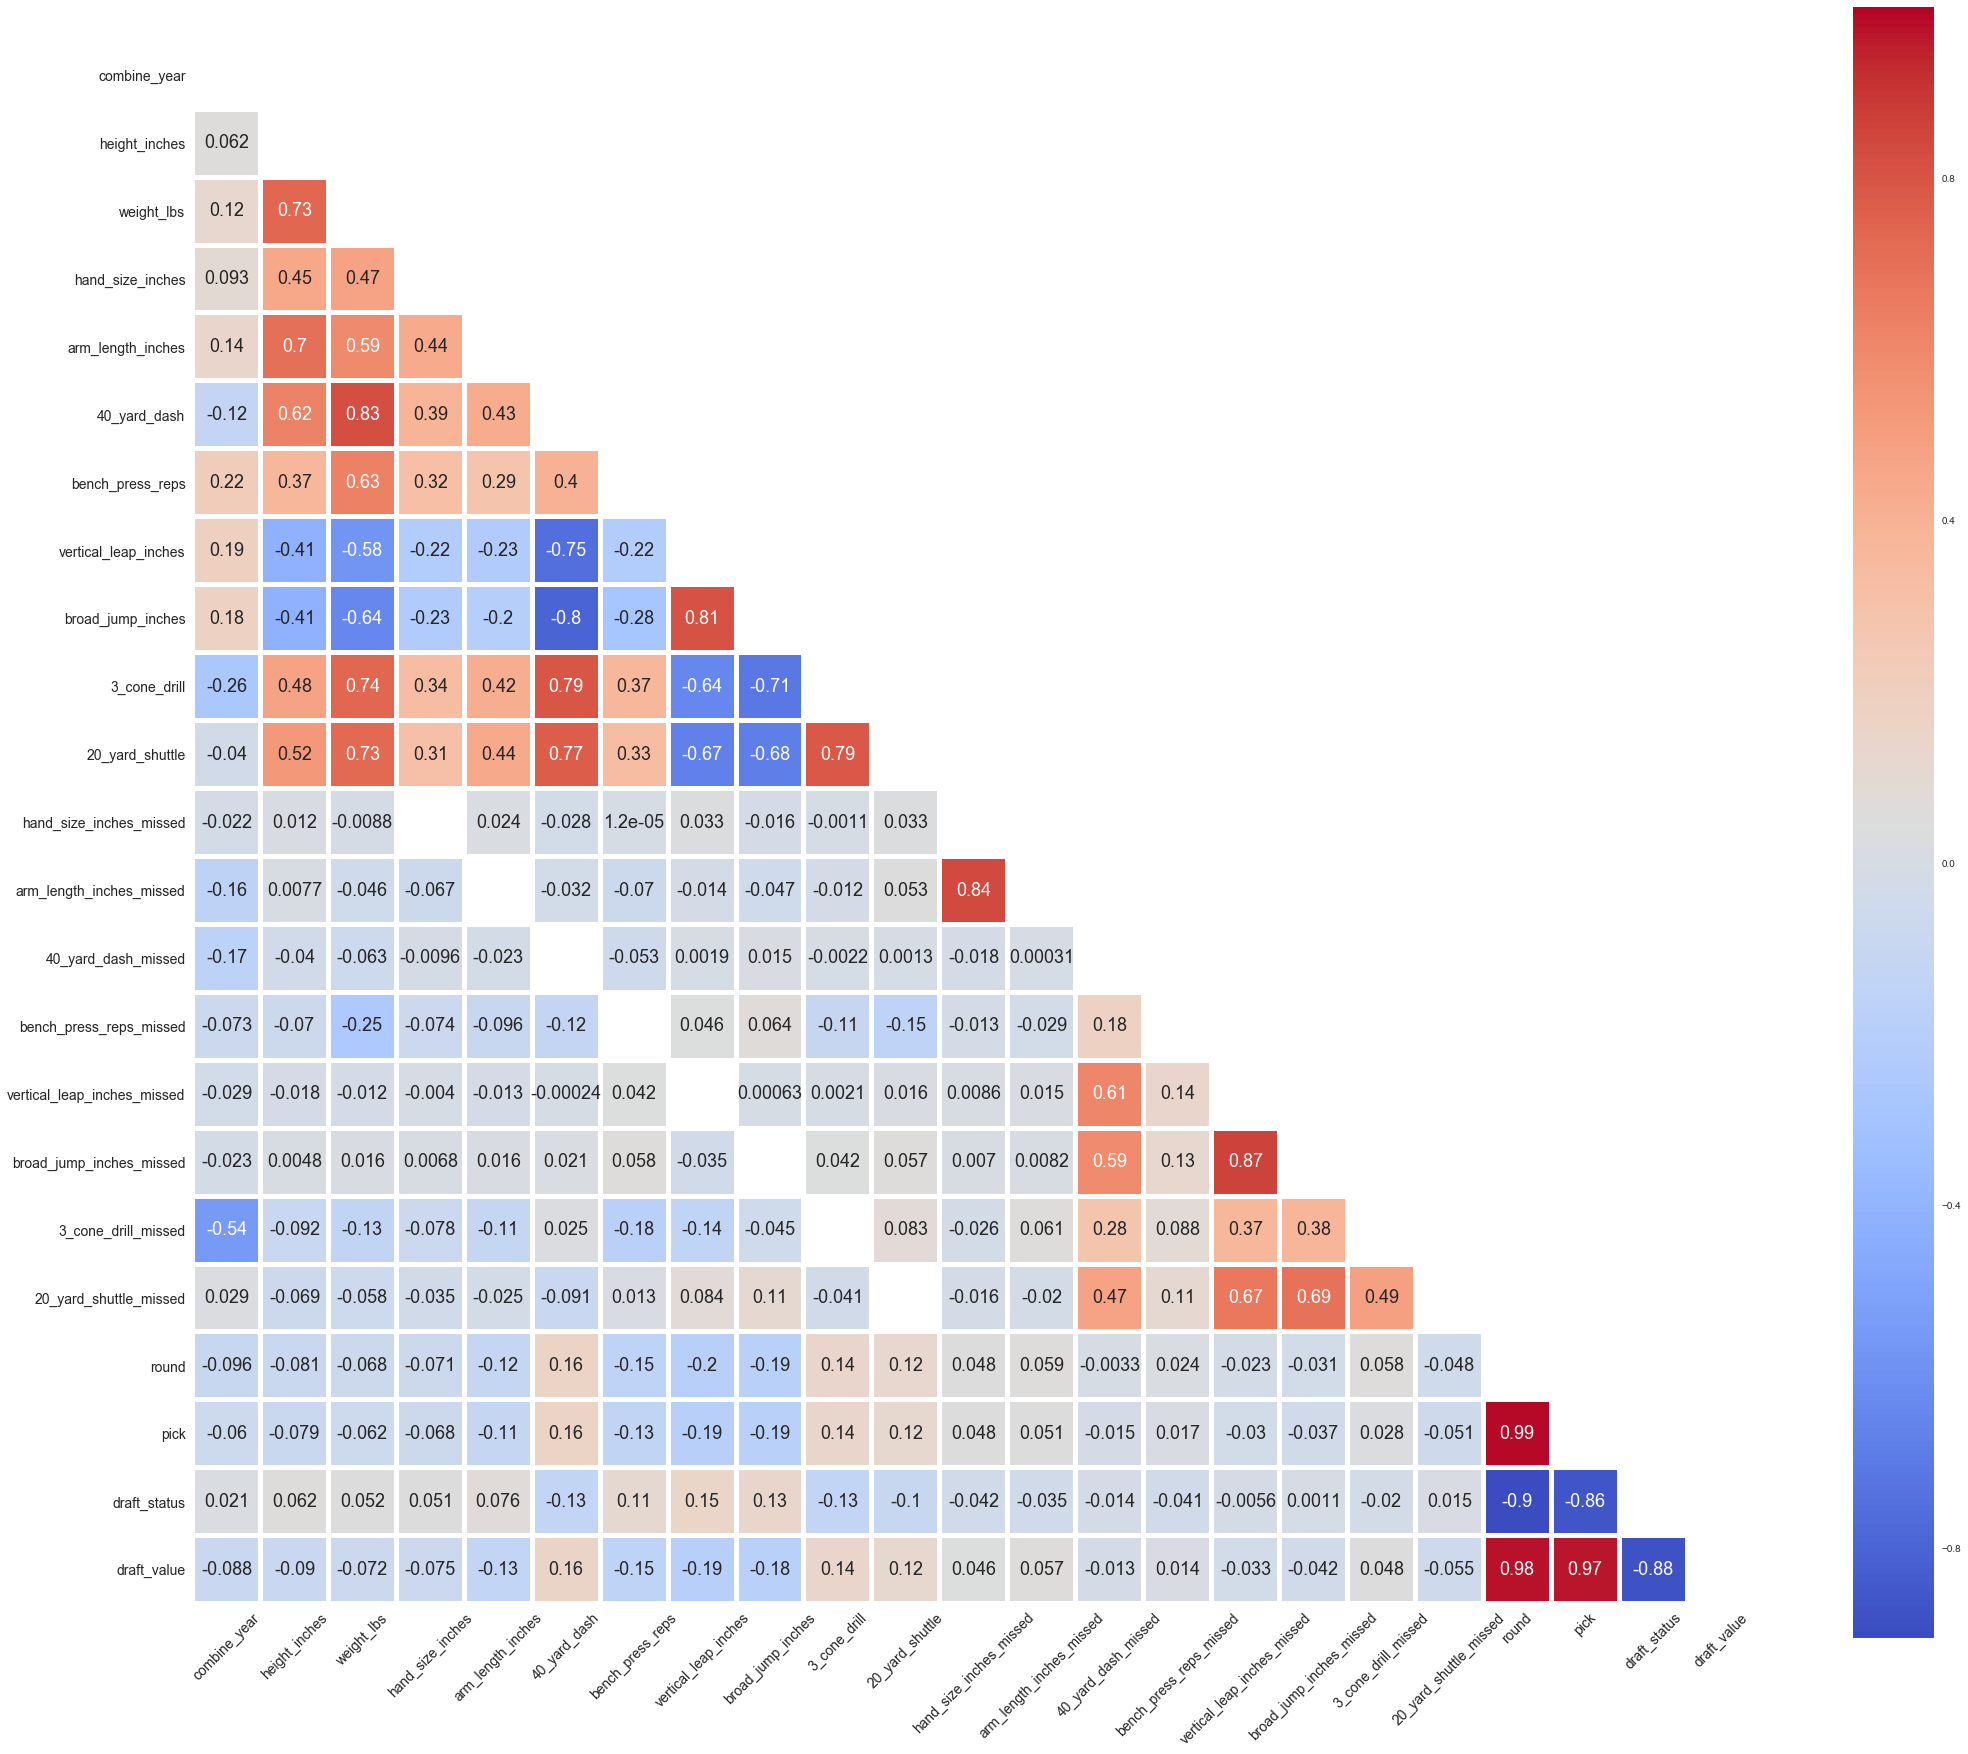

In [17]:
#Correlation Heatmap of all variables in the nfl_merged_df dataset

mask = np.zeros_like(nfl_merged_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(35,30))
ax = sns.heatmap(nfl_merged_df.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Distribution of Combine Drills by Position

### Distribution of Draft Status by Position

## Train and Test Dataset Creation



In [18]:
#Split nfl_df into train and test datasets for our draft_status and draft_value models, using a randomized 80/20 split

#features for all models
features_nfl = nfl_merged_df.iloc[:,6:16]

#train and test datasets for draft_status model
draft_status = nfl_merged_df['draft_status']
# x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features_nfl, draft_status, test_size = 0.2, random_state = 10)

#train and test datasets for draft_value model
draft_value = nfl_merged_df['draft_value']
# x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features_nfl, draft_value, test_size = 0.2, random_state = 10)


## Data Imputation

### Linear Regression Imputation



## Scaling

### Standard Scaler

## Oversampling

### SMOTE

## Feature Selection

For modeling purposes, we used recursive feature elimination for both our logistic regression model and our simple linear regression model. This process uses cross-validation techniques, using accuracy as a metric, to eliminate variables that may hurt our model performance. Those variables get dropped from the dataset prior to modeling.

### Recursive Feature Elimination for Logistic Regression Model

In [19]:
# logreg_model = LogisticRegression()
# rfecv_log = RFECV(estimator=logreg_model, step=1, cv=StratifiedKFold(10), scoring='accuracy')
# rfecv_log.fit(x_train_log, y_train_log)

In [20]:
# feature_importance_log = list(zip(features_log, rfecv_log.support_))
# new_features_log = []
# for key,value in enumerate(feature_importance_log):
#     if(value[1]) == True:
#         new_features_log.append(value[0])
        
# print(new_features_log)

## Final Train and Test Datasets after Feature Selection



In [21]:
#final train and test datasets for logistic regression model
# x_train_log = x_train_log[new_features_log]
# x_test_log = x_test_log[new_features_log]

# print(x_train_log.shape)
# print(x_test_log.shape)